In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pygrib

In [7]:
grbs = pygrib.open('/Users/brandonmcclung/Downloads/MRMS_VII_00.50_20210728-143439.grib2')
print(grbs)

In [8]:
for grb in grbs:
    print(grb)

1:43:43 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202107281434


ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(39) ignored
ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(39) ignored


In [9]:
print(grb.keys())

['globalDomain', 'GRIBEditionNumber', 'tablesVersionLatestOfficial', 'tablesVersionLatest', 'grib2divider', 'angleSubdivisions', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'md5Section1', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'is_chemical', 'is_chemical_distfn', 'is_chemical_srcsink', 'is_aerosol', 'is_aerosol_optical', 'setCalendarId', 'deleteCalendarId', 'sectionNumber', 'grib2LocalSectionPresent', 'deleteLocalDefinition', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefinition', 'numbe

In [10]:
lats, lons = grb.latlons()
vii = grb.values
print(np.shape(lats))
print(np.shape(vii))

(3500, 7000)
(3500, 7000)


In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

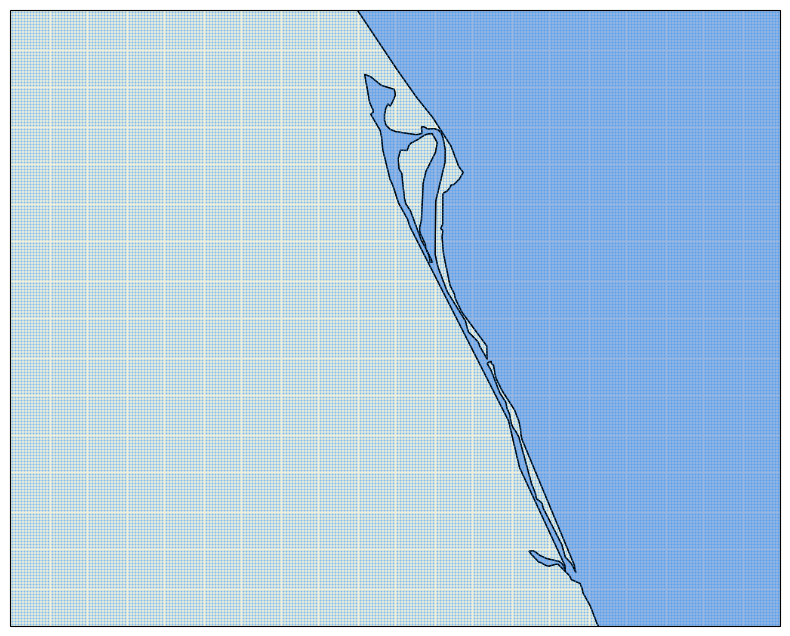

In [33]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-82,-79.5,27,29],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN, edgecolor="black")


plt.scatter(x=lons,y=lats,color='dodgerblue',s=.3,alpha=.5,transform=ccrs.PlateCarree())

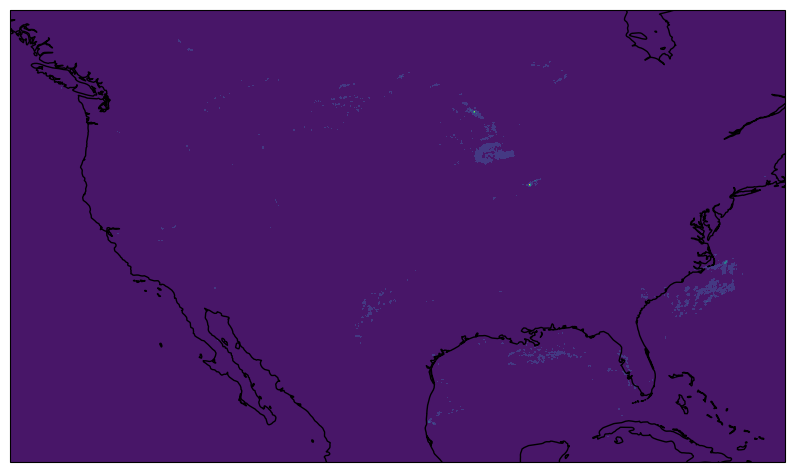

In [44]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-70,-130,20,55],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN, edgecolor="black")
plt.contourf(lons,lats,vii,transform=ccrs.PlateCarree())
ax.coastlines()

In [45]:
import pickle

In [49]:
lats_file = open('/Users/brandonmcclung/Data/pickles/MRMS_lat.p','wb')
lons_file = open('/Users/brandonmcclung/Data/pickles/MRMS_lon.p','wb')

pickle.dump(lats,lats_file)
pickle.dump(lons,lons_file)

lats_file.close()
lons_file.close()

